## Observations and Insights 

#1 The distribution of the female and male mice is relatively even, with males being 2% higher.

#2 For the Capomulin regimen, mouse weight and average tumor volume has a positive linear regression.

#3 Capomulin has the highest number of total measurements.

#4 Infubinol is the only drug regimen that has an outlier (out of Capomulin, Ramicane, Infubinol, and Ceftamin).

#5 The tumor volume of Mouse l509 was highest on the 19th day.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the data table for preview
combined_mouse_data_df = pd.merge(mouse_metadata, study_results,
                              how="outer", on="Mouse ID")
combined_mouse_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = combined_mouse_data_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data_df.loc[combined_mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_data_df.loc[combined_mouse_data_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_mouse_data_df[combined_mouse_data_df['Mouse ID'].isin(duplicate_mice) == False]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Calculate the  mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen: 
summary_df = clean_data_df.groupby("Drug Regimen")
summary_df = summary_df["Tumor Volume (mm3)"]

summary_mean = summary_df.mean().round(2)
summary_median = summary_df.median().round(2)
summary_variance = summary_df.var().round(2)
summary_std = summary_df.std().round(2)
summary_sem = summary_df.sem().round(2)

# Assemble single summary dataframe.
summary_statistics_df = pd.DataFrame({"Average": summary_mean,
                                     "Median": summary_median,
                                     "Variance": summary_variance,
                                     "Standard Deviation": summary_std,
                                     "SEM": summary_sem})
summary_statistics_df


,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table in a single line
summary_statistics_df = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_statistics_df.round(2)                                                                

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

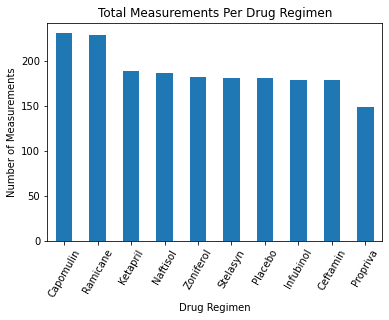

In [9]:
# Calculate total number of measurements per regimen 
counts = clean_data_df["Drug Regimen"].value_counts()

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts.plot(kind= "bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 60)
plt.ylabel("Number of Measurements")
plt.title("Total Measurements Per Drug Regimen")
plt.show()




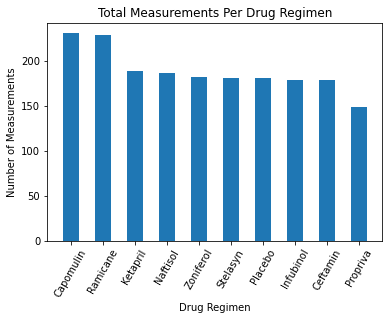

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = clean_data_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values, width = .5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 60)
plt.ylabel("Number of Measurements")
plt.title("Total Measurements Per Drug Regimen")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

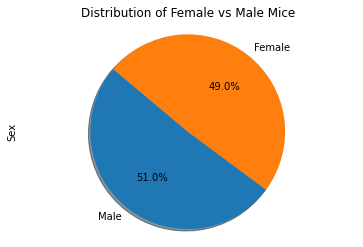

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_data_df.Sex.value_counts()
counts.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

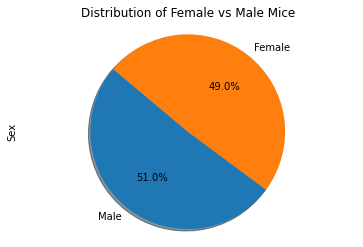

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_data_df.Sex.value_counts()
plt.pie(counts.values, labels = counts.index.values, autopct='%1.1f%%', shadow=True, startangle=140)
plt.ylabel('Sex')
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = max_tumor.merge(clean_data_df, on = ['Mouse ID', 'Timepoint'], how = "left")

In [14]:
# Create a treatments list for a for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merge_data.loc[merge_data["Drug Regimen"] == drugs,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    if outliers.empty:
        print(f"{drugs}'s potential outliers: None")
    else:
        print(f"{drugs}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: None


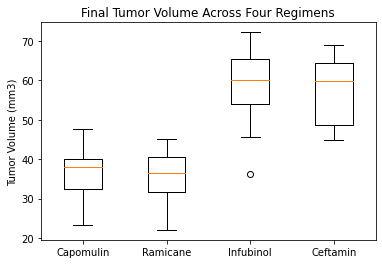

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volume = final_tumor_volume 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens')
plt.boxplot(tumor_volume_list, labels = treatments_list)
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

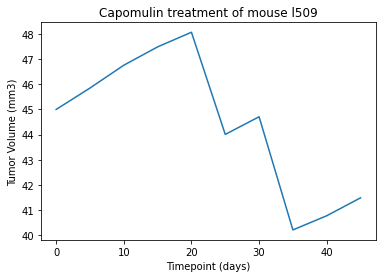

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


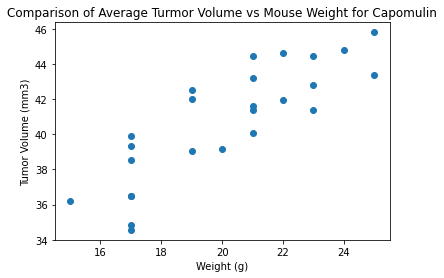

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
average_volume = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Comparison of Average Turmor Volume vs Mouse Weight for Capomulin')
plt.show()


## Correlation and Regression

The correlation between the mouse weight and average tumor volume is 0.84


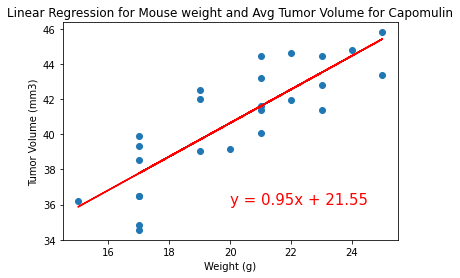

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
print(f"The correlation between the mouse weight and average tumor volume is {round(correlation[0],2)}")

# Find the linear regression for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_volume['Weight (g)']
y_values = average_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Linear Regression for Mouse weight and Avg Tumor Volume for Capomulin')
plt.show()

